# Classical Statistical Inference: Part 2

## Table of Content

- II. [What is statistical inference ?](#II) 
    * II.1 [Point estimate](#II.1-Point-estimate:)
    * II.2 [Confidence interval](#II.2-Confidence-interval:)
        - [II.2.1 Normal distribution with a known variance](#II.2.1-Normal-distribution-with-a-known-variance)
        - [II.2.2. Interpretation of CI](#II.2.2-Interpretation-of-CI)
        - [II.2.3 Normal distribution with an unknown variance](#II.2.3-Normal-distribution-with-unknown-variance)
        - [II.2.4 Confidence interval for variances](#II.2.4-Confidence-interval-for-variances)
        - [II.2.5 Confidence interval between 2 means](#CImean-diff)
        - [II.2.6 Confidence interval for proportions](#II.2.6-Confidence-intervals-for-proportions)
    * II.3 [Hypothesis testing](#II.3-Hypothesis-testing) 
        - [II.3.1 Student's t test](#II.3.1.-Student's-t-test)
        - [II.3.2 Paired test to compare means ot 2 dependent populations](#II.3.2-Paired-test-to-compare-means-ot-2 dependent-populations)
        - [II.3.3 Paired test for means of 2 independent populations](#II.3.3-Paired-test-to-compare-means-of-2-independent-populations)
        - [II.3.4 What to do if the population distributions are not gaussian ?](#II.3.4-What-to-do-if-the-population-distributions-are-not-gaussian-?)
        - [II.3.5 Hypothesis testing for proportions](#II.3.5-Hypothesis-testing-for-proportions)
    * II.4 [Bootstrap](#II.4-Bootstrap)
       - [II.4.1 Bootstrap confidence interval](#Bootstrap-Confidence-Interval) 
       - [II.4.2 Jacknife](#II.4.2-Jacknife)
   * II.5 [Wrap up: Various approaches of hypothesis testing](#II.5-Wrap-up:-Various-approaches-of-hypothesis-testing)
    
- X. [References and supplementary material](#X)

## II. What is statistical inference ?  <a class="anchor" id="II"></a>

Statistical inference is the process that consists in deriving information about a phenomenon/something based on a data set. More specifically, it the process of using data to infer the distribution that "generated" the data. This is what is called "learning" in the context of computer science. 

Statistical inference implies first to define a **statistical model** (or several) that describe(s) the data. This can be distribution function(s) but also a regression law(s), that is (are) parametrized by a finite number of parameters, generally denoted $\theta$ in most of statistical books. Then, the remaining of the "game" is to confront this model to the data to see if it is well suited, and whether we can infer the values of its parameters.  

There is basically three types of inference one draws from data:
- ** Point estimation **: What is the best estimate for a model parameter $\theta$ based on the available data ? 
- ** Confidence estimation **: How confident should we be about our point estimate ? 
- ** Hypothesis testing **: Are the data at hand consistent with a given hypothesis or model ? 

This is common to any statistical paradigm (i.e. Frequentist and Bayesian). We will see first how statistical inference is performed under the "classical" (aka frequentist) paradigm. In a future lecture, we will see the Bayesian approach and try to understand the "philosphical" differences between those. 

### II. 1 Point estimate:

Point estimates are estimates of *population parameters based on sample data*. For example, we may want to estimate the mean color of elliptical galaxies at a given redshift based on a subsample drawn from a survey. We would derive a mean value that may differ from the true population mean for several reasons: statistical fluctuation due to the limited size of the sample, bias in selection, ...  

For frequentists, thist consists in deriving a single **best** guess for a quantity of interest, that can be a parameter in a parametric model, a regression function, a CDF $H(x)$, a pdf $h(x)$ or predictions for a future value $Y$ of a random variable. 

By convention, the point estimate of a parameter $\theta$ is denoted $\hat{\theta}$. Remember that here, there is one *single fixed value* of $\theta$, while the estimator $\hat{\theta}$ depends on the data, and is therefore a random variable.   

A point estimator $\hat{\theta}$ of a parameter $\theta$ is a function of the random variables $X_1$, $X_2$, ... such that:    
$$
\hat{\theta} = g(X_1, X_2, X_3, ... X_n)
$$

As for any estimator you have encountered in descriptive statistics, this estimator can be biased (i.e. its value could differ from its true value by some amount), and be characterized by some variance (remember that $\hat{\theta}$ is a random variable). 

You could think that the "(un)-biased" character of an estimator is critical property of the estimator we would look at, but in fact this is not always critical, and many of the estimators we will consider are biased. More important is that a point estimator $\hat{\theta}$ **asymptotically converges** to the true parameter value (with asymptotically null variance). Mathetematicians then states that an estimator is **consistent**.  

The distribution of $\hat{\theta}$ is called the **sampling distribution**.  

An important theorem to keep in mind when studying point estimates is the **central limit theorem** which states that: when independent random variables are added, their sum tends toward a normal distribution even if the original variables themselves are not normally distributed. For that reason, if you want to measure the arithmetic mean $\mu$ of a population, you can be sure that the *sampling distribution* of $\hat{\mu}$ will tend towards a normal distribution even if the number of samples is large.    

**Note:**   
For those who are familiar with bayesian statistics, the fact that $\theta$ (i.e. the population parameter, *not* its sample estimate $\hat{\theta}$) is not considered as a random variable, is one of the key difference between frequentist and bayesian inference. 

Parameters of the gaussian fit vs population mean: hat(mu)=-0.26, mu_pop=-0.26


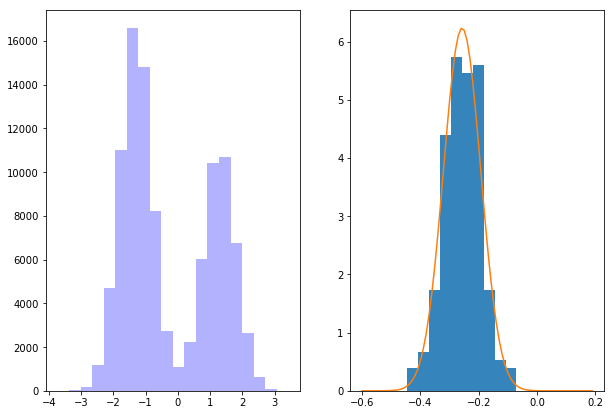

In [1]:
# Illustration of the central limit theorem

import scipy.stats
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Nmeans = 200
np.random.seed(0)

f, ax = plt.subplots(ncols=2, figsize=(10, 7))

fracs = (0.6, 0.4)   # the relative contribution of each gaussian
dist1, dist2 = scipy.stats.norm(-1.3, 0.5), scipy.stats.norm(1.3, 0.5)
x_sample = np.concatenate( (dist1.rvs(int(fracs[0]*100000)), dist2.rvs(int(fracs[1]*100000))) ) # Large sample drawn from a bimodal population

# Let's calculate the mean 
point_estimates = []         # Make empty list to hold point estimates

for x in range(Nmeans):         # Generate 200 samples
    # I pick 500 elements randomly from the original large sample (that approximate the population distrib)
    sample = np.random.choice(a= x_sample, size=500)        
    point_estimates.append( sample.mean() )   # I estimate the mean and put the result in the list "point_estimate"

# let's fit a Gaussian on the pdf of the means
gaussfit_mu, gaussfit_std = scipy.stats.norm.fit(point_estimates)
xval = np.arange(-0.6,0.2, 0.01)

ax[0].hist(x_sample, bins=20, color='blue', alpha=0.3)
ax[1].hist(point_estimates, normed=True, alpha=0.9)
ax[1].plot(xval, scipy.stats.norm.pdf(xval, gaussfit_mu, gaussfit_std))

print 'Parameters of the gaussian fit vs population mean: hat(mu)=%.2f, mu_pop=%.2f' %(gaussfit_mu, np.mean(x_sample))

## II.1.2 Summary of useful statistics

| | Sample Statistics | Population Statistics | 
|:-------|:------|:----------------| 
|size   | n     | N | 
| mean  | $\hat{\mu} = \bar{x} = \frac{\sum_i x_i}{n}$ | $\mu = \bar{X} = \frac{\sum_i X_i}{n}$ |  
| Variance | $s^2 = \frac{\sum_i(x_i-\bar{x})^2}{n-1}$ | $\sigma^2 = \frac{\sum_i(X_i-\bar{X})^2}{N}$ |
| Standard deviation | $\hat{\sigma} = s = \sqrt{s^2}$  | $\sigma = \sqrt{\sigma^2}$ |
| Proportions | $\hat{p} = \frac{n {\rm{~of~success}} } {n {\rm{~of~trials}}}$ | $\hat{p} = \frac{N {\rm{~of~success}} }{N {\rm{~of~trials}}} $|


In addition: 
* **Standard error on the mean**: standard deviation of the distribution of sample means: $stde(\bar{x}) = \frac{s} { \sqrt{n}}$
* **Standard error on the sample proportion**: standard deviation of the distribution of sample proportions: $stde(\hat{p}) = \frac{ \sqrt{p\,(1-p)} }  {\sqrt{n}} $


### II.2 Confidence interval: 

We have seen that to each estimator $\hat{\theta}$ is associated a pdf. Building a confidence interval consists in defining a region (a, b) that contains $\hat{\theta}$, and that is such that:

$$
p(\theta \in [a,b]) \leq 1-\alpha. 
$$. 

If $\alpha = 0.05$, one speaks of a $(1-\alpha)*100 \% = 95\%$ confidence interval. 

Note that $a, b$ are functions of the observed sample.  

=> The strategy to draw a confidence interval around $\hat{\theta}$ is to look at the distribution of $\hat{\theta}$ (which could be known theoretically or unknown) and define regions around $\hat{\theta}$ that contain/enclose (1-$\alpha) \times 100$% of the *probability distribution*. Those intervals can be one-sided ($p(\theta \in ]-\infty, \theta_{up}])$ or $p(\theta \in [\theta_{low}, +\infty[)$) or two-sided.

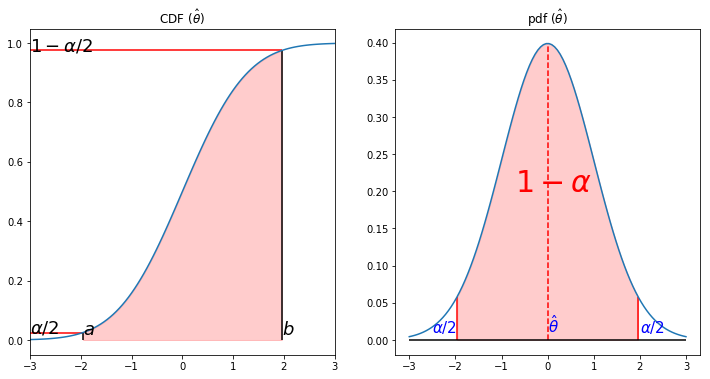

In [63]:
# Visual interpretation of the CI around the mean for a normal distribution
import scipy.stats
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

alpha = 0.05
norm = scipy.stats.norm()
x = np.linspace(-3.,3.,100)
f, ax = plt.subplots(ncols=2, figsize=(12, 6))
ax[1].plot(x, norm.pdf(x))
ax[0].plot(x, norm.cdf(x))

a, b = norm.ppf(alpha/2.), norm.ppf(1-alpha/2.)
ax[0].hlines(alpha/2., -3, a, color='red')
ax[0].hlines(1.-alpha/2., -3, b, color='red')
ax[0].vlines(a, 0., norm.cdf(a))
ax[0].vlines(b, 0., norm.cdf(b))
ax[0].fill_between(np.linspace(a, b, 100), 0, norm.cdf(np.linspace(a, b, 100)), color='red', alpha=0.2)
ax[0].annotate(r'$\alpha/2$', (-3, alpha/2.), fontsize=18.)
ax[0].annotate(r'$1-\alpha/2$', (-3, 1.-alpha/2.), fontsize=18.)
ax[0].annotate(r'$a$', (a, 0.02), fontsize=18.)
ax[0].annotate(r'$b$', (b, 0.02), fontsize=18.)

cv1 = ax[1].vlines(a, 0, norm.pdf(a), color='red')
cv2 = ax[1].vlines(b, 0, norm.pdf(b), color='red')
cm = ax[1].vlines(0, 0, norm.pdf(0), linestyle = '--', color='red')
c0 = ax[1].hlines(0, -3, 3, color='black')
ax[0].set_xlim(-3,3)
ax[1].fill_between(np.linspace(a, b, 100), 0, norm.pdf(np.linspace(a, b, 100)), color='red', alpha=0.2)
ax[1].text(-0.7, 0.2,r'$1-\alpha$', color='red', fontsize=30)
ax[1].text(-2.5, 0.01,r'$\alpha/2$', color='blue', fontsize=15)
ax[1].text(2., 0.01,r'$\alpha/2$', color='blue', fontsize=15)
ax[1].text(0., 0.01, r'$\hat{\theta}$', color='blue', fontsize=15)
ax[1].set_title(r'pdf ($\hat{\theta}$)')
ax[0].set_title(r'CDF ($\hat{\theta}$)')

Hopefully, you then end up with: 

$$
\hat{\theta} \pm (multiplier) \times \, stde(\hat{\theta}),
$$

where $\hat{\theta}$ is your *point-estimate* of $\theta$, and $stde(\hat{\theta})$ is the *standard error* on your estimator. The *multiplier* factor depends simply of the pdf of your estimator. For a gaussian, as we have seen last time, it will be 1.96 for a 95% confidence interval. 

For a one sided confidence interval:

$$
p(\theta < b) \leq 1-\alpha. 
$$. 

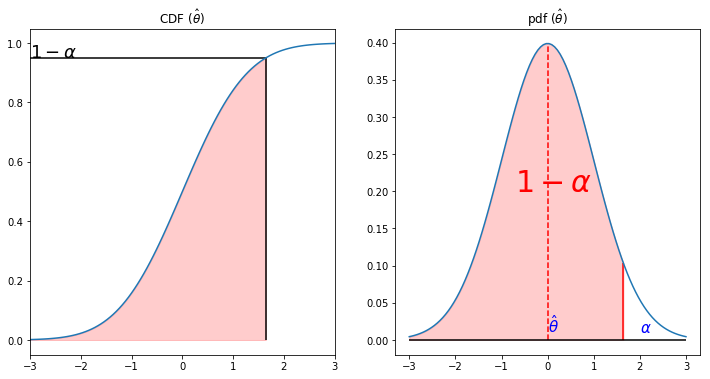

In [61]:
# The same for p(theta < b) < 1-alpha
alpha = 0.05
norm = scipy.stats.norm()
x = np.linspace(-3.,3.,100)
f, ax = plt.subplots(ncols=2, figsize=(12, 6))
ax[1].plot(x, norm.pdf(x))
ax[0].plot(x, norm.cdf(x))

b =  norm.ppf(1-alpha)
ax[0].hlines(1.-alpha, -3, b, color='black')
ax[0].vlines(b, 0., norm.cdf(b))
ax[0].fill_between(np.linspace(-3, b, 100), 0, norm.cdf(np.linspace(-3,  b, 100)), color='red', alpha=0.2)
ax[0].annotate(r'$1-\alpha$', (-3, 1.-alpha), fontsize=18.)

cv2 = ax[1].vlines(b, 0, norm.pdf(b), color='red')
cm = ax[1].vlines(0, 0, norm.pdf(0), linestyle = '--', color='red')
c0 = ax[1].hlines(0, -3, 3, color='black')
ax[0].set_xlim(-3,3)
ax[1].fill_between(np.linspace(-3, b, 100), 0, norm.pdf(np.linspace(-3, b, 100)), color='red', alpha=0.2)
ax[1].text(-0.7, 0.2,r'$1-\alpha$', color='red', fontsize=30)
#ax[1].text(-2.5, 0.01,r'$\alpha/2$', color='blue', fontsize=15)
ax[1].text(2., 0.01,r'$\alpha$', color='blue', fontsize=15)
ax[1].text(0., 0.01, r'$\hat{\theta}$', color='blue', fontsize=15)
ax[1].set_title(r'pdf ($\hat{\theta}$)')
ax[0].set_title(r'CDF ($\hat{\theta}$)')

#### II.2.1 Normal distribution with a known variance (z-confidence interval)

If $\{x_i\}$ is our sample of $N$ points drawn from a normal distribution of mean $\mu$ and width $\sigma$, then the estimator $\bar{x}$ follows a normal distribution $N(\mu, \sigma/\sqrt{N}$) (remember that your standard error on the mean, $stde = \sigma/\sqrt{N})$. This is equivalent to say that the distribution of the random variable $(\bar{x}-\mu)/stde$ follows a normal distribution $N(0,1)$.     

If we define $z_{\alpha/2} = CDF^{-1}(1-\alpha/2)$, such that $p(Z \leq \alpha/2 ) = \alpha/2$, then the confidence interval is simply: 

$$
CI_{\alpha} = [\bar{x}-z_{\alpha/2} \, stde , {\bar{x}}+z_{\alpha/2} \, stde] = [\bar{x}-z_{\alpha/2} \, \frac{\sigma}{\sqrt{N}} , {\bar{x}}+z_{\alpha/2} \, \frac{\sigma}{\sqrt{N}}] 
$$

You can also write the CI as:
$$
 {\bar{x}} \pm z_{\alpha/2} \, \frac{\sigma}{\sqrt{N}}
$$

A 95% confidence interval would then be $[\bar{x}-1.96\,stde, \bar{x}-1.96\,stde]$, i.e. $z_{\alpha/2} = 1.96$. 

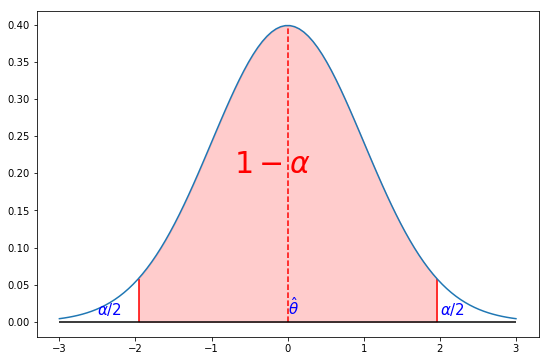

In [2]:
# Visual interpretation of the CI around the mean for a normal distribution
import scipy.stats
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

norm = scipy.stats.norm()
x = np.linspace(-3.,3.,100)
plt.figure(figsize=(9, 6))
plt.plot(x, norm.pdf(x))
a1, a2 = norm.ppf(0.025), norm.ppf(1-0.025)
cv1 = plt.vlines(a1, 0, norm.pdf(a1), color='red')
cv2 = plt.vlines(a2, 0, norm.pdf(a2), color='red')
cm = plt.vlines(0, 0, norm.pdf(0), linestyle = '--', color='red')
c0 = plt.hlines(0, -3, 3, color='black')
plt.fill_between(np.linspace(a1, a2, 100), 0, norm.pdf(np.linspace(a1, a2, 100)), color='red', alpha=0.2)
plt.text(-0.7, 0.2,r'$1-\alpha$', color='red', fontsize=30)
plt.text(-2.5, 0.01,r'$\alpha/2$', color='blue', fontsize=15)
plt.text(2., 0.01,r'$\alpha/2$', color='blue', fontsize=15)
plt.text(0., 0.01, r'$\hat{\theta}$', color='blue', fontsize=15)

#### How to estimate $z_{\alpha/2}$ in `python` ? 

When the distribution of the variable is known, it is easy to get the confidence interval from the CDF using `scipy.stats.distribution.ppf(a)`. This function gives, for a probability $p(x > a)$ the corresponding value of x. 

In [2]:
# Let's try the case of a 1% confidence interval
alpha = 0.01
# Imagine that we have 10 data points drawn from a gaussian of mean 20, and width 3
mu, sigma = 20, 3.
Npts = 1
norm = scipy.stats.norm(mu, sigma)
x_sample = norm.rvs(Npts)   # We generate our fake sample, i.e. draw 10 points from the Gaussian
x_mean = np.mean(x_sample)   # we calculate the mean of our random variable
# The mean has a distribution N(mu, sigma/sqrt(N))
norm_mean = scipy.stats.norm(0,1)
stde = sigma/np.sqrt(Npts)
za1, za2 = norm_mean.ppf(alpha/2.), norm_mean.ppf(1-alpha/2.)
a1, a2 = x_mean+za1*stde, x_mean+za2*stde
print "My %.2f percents confidence interval around %.2f is [%.2f,%.2f] " %((1-alpha)*100., x_mean, a1, a2)

# Alternatively, we can also do:
norm_mean = scipy.stats.norm(x_mean, sigma/np.sqrt(Npts))
a1, a2 = norm_mean.ppf(alpha/2.), norm_mean.ppf(1-alpha/2.)
print "My %.2f percents confidence interval around %.2f is [%.2f,%.2f] " %((1-alpha)*100., x_mean, a1, a2)

# A second alternative using "interval" method (that takes 1-alpha as argument !)
a1, a2 = scipy.stats.norm.interval((1-alpha), loc=x_mean, scale=sigma/np.sqrt(Npts))
print "My %.2f percents confidence interval around %.2f is [%.2f,%.2f] " %((1-alpha)*100., x_mean, a1, a2)

My 99.00 percents confidence interval around 16.53 is [8.81,24.26] 
My 99.00 percents confidence interval around 16.53 is [8.81,24.26] 
My 99.00 percents confidence interval around 16.53 is [8.81,24.26] 


#### II.2.2 Interpretation of CI

An important point to keep in mind, in interpreting confidence intervals in *a frequentist way*, is that a confidence interval **is not a probability statement about $\theta$** since $\theta $ is a fixed quantity (i.e. $\theta$ is NOT a random variable). A 95% confidence interval means that if you repeat your observation over and over, then, 95% of the time $\theta$ will fall in your confidence interval. [Wasserman](#WAS04) suggests an alternative interpretation. Imagine that you measure one day one parameter $\theta_1$ and derive a 95% confidence interval $C_1$. The next day, you do it for another parameter $\theta_2$ (possibly associated to a different experiment), and get $C_2$. And so on. Imagine you did it for 100 parameters. Then, what, 95 times you will have trapped the true parameter value, and 5 times you won't. In other words, your confidence interval $C_n$ is a random variable.  

#### Example: 

The following example, taken from [Wasserman](#WAS04) and originally given by Berger and Wolpert (1984), is interesting to understand CI in the context of a frequentist paradigm. Let $\theta$ be a fixed known real number, and $X_1$, $X_2$ be two independent random variables such that $p(X_i = 1) = p(X_i = -1) = 1/2$. Now let's define another random variable, $Y_i = \theta+X_i$, and suppose that you observe obly $Y_1$ and $Y_2$. We can then define the following confidence interval (that contains effectively one point):   


$$
C~=~{Y_1 - 1} ~{\rm {if~}} Y_1 = Y_2   \\
C~=~{(Y_1 + Y_2)/2} ~{\rm {if~}} Y_1 \neq Y_2
$$


You can check, no matter what $\theta$ is, you have $p(\theta) \in C = 3/4$, which means that we have 75% confidence interval. 
Let's imagine that we do an experiment and draw $Y_1 = 18$ and $Y_2=16$. Then our 75% confidence interval is {17}. However, you are certain that $\theta$ = 17. This does not mean that CI in the context of classical inference is nonsense, it simply underlines that you cannot make a probability statement about $\theta$ based on your CI. The only valid probability statement about $\theta$ you can make is $p(\theta ~\in ~C| Y_1, Y_2 ) = 1$.  

If you want to interpret a confidence interval as a statement about the probability that $\theta$ is in a given range, then you'll have to wait for our class on Bayesian inference. 

#### II.2.3 Normal distribution with *unknown variance*

In the case where the variance of our population is unknown, then, we use our estimator $\hat{\sigma} = \sqrt{1/(n-1) \, \sum_i (x_i-{\bar{x}})^2}$ instead of $\sigma$. 

The distribution of the mean $\bar{x}$ when the variance/standard deviation is unknown (i.e. the distribution of $(\bar{x}-\mu)/\hat{\sigma}$ is **not** a normal distribution, but almost. It is a Student's distribution (note that the inventor of the Student's distribution is not Mr Student but Mr R. Gosset who used the pseudonym of Student's for his publication).  

In that case our condifidence interval can be re-written: 

$$
CI_{\alpha} = [\bar{x}-t_{\alpha/2} \, se , {\bar{x}}+t_{\alpha/2} \, se] = [\bar{x}-t_{\alpha/2} \, \frac{\sigma}{\sqrt{N}} , {\bar{x}}+t_{\alpha/2} \, \frac{\sigma}{\sqrt{N}}] , 
$$

where $t_{\alpha/2} = CDF^{-1}(1-\alpha/2)$, and the CDF is the one of the Student's distribution. 

**Exercise:**

Let's consider the following sample of 10 points drawn from a normal distribution $N(\mu=20, \sigma=3)$

``` python
mu, sigma = 20, 3.
Npts = 10
norm = scipy.stats.norm(mu, sigma)
x_sample = norm.rvs(Npts)  
```
- Compare the distribution of means when you assume that you know $\sigma$ and when you estimate $\sigma$ directly from the data. (Use directly `scipy.stats.distribution.pdf()`, note that the student's distribution is `scipy.stats.t(dof)`)
- Calculate a 99% confidence interval around the mean (for a stdev estimated from the data) and compare to the results we obtained above.  

#### II.2.4 Confidence interval for variances

We have seen (cf Exercise in Lecture 4) that if random variables $\{x_i\}$ are normally distributed with mean $\mu$ and variance $\sigma$, then $(n-1)\, \hat{\sigma}^2 / \sigma^2$  is distributed as a $chi^2(n-1)$ distribution (where $\hat{\sigma}^2$ is the variance estimated from the sample). 

Once we know the distribution of our random variable, it becomes easy to calculate the confidence interval.   
This time, we need to calculate $c_{1-\alpha/2} = \chi^2_{1-\alpha/2}(n-1)$, $c_{\alpha/2} = \chi^2_{\alpha/2}(n-1)$. Those values, multiplied by the variance of the $\chi^2$ distribution will enclose the true variance:

$$
CI_{\sigma^2} = \left[\frac{(n-1)}{c_{\alpha/2}}\, \hat{\sigma}^2, \frac{(n-1)}{c_{1-\alpha/2}}\, \hat{\sigma}^2 \right]
$$

For the standard deviation, it is sufficient to take the square root of the variance:

$$
CI_\sigma = \left[\sqrt{\frac{(n-1)}{c_{\alpha/2}}} \, \hat{\sigma}, \sqrt{\frac{(n-1)}{c_{1-\alpha/2}}}\, \hat{\sigma} \right]
$$

**Example:**

Let's consider the ensemble of 10 points drawn from a normal distribution $N(\mu=20, \sigma=3)$ in the previous example. Let's estimate a 95% confidence interval on its variance:


In [98]:
np.random.seed(12356)

alpha = 0.01
# Imagine that we have 10 data points drawn from a gaussian of mean 20, and width 3
mu, sigma = 20, 3.
Npts = 100
norm = scipy.stats.norm(mu, sigma)
x_sample = norm.rvs(Npts)   # We generate our fake sample, i.e. draw 10 points from the Gaussian
x_mean = np.mean(x_sample)   # we calculate the mean of our random variable
x_sigma = np.std(x_sample, ddof=1) # Estimated stdev of the distribution

# Chi^2 distribution of the std dev
chi_std = scipy.stats.chi2(df=Npts-1)   
ca1, ca2 = chi_std.ppf(1-alpha/2.), chi_std.ppf(alpha/2.)
a1, a2 = np.sqrt( (Npts-1) / ca1 ) * x_sigma , np.sqrt( (Npts-1) / ca2 ) * x_sigma
print "My %.2f percents confidence interval around %.2f is [%.2f,%.2f] " %((1-alpha)*100., x_sigma, a1, a2)

My 99.00 percents confidence interval around 2.73 is [2.30,3.33] 


#### II.2.5. CI for difference between 2 means   <a class="anchor" id="CImean-diff"></a>


1. If the two means are drawn from **2 populations with the same variance**, the confidence interval is: 

$$
(\bar{X} - \bar{Y}) \, \pm \, t_{\alpha/2, n+m-2} \, \hat{\sigma}_p \sqrt{ \frac{1}{m} + \frac{1}{n}}
$$

where $\hat{\sigma}^2_p$ is the "pooled variance" (an unbiased estimator of the variance of the difference of the means):

$$
\hat{\sigma}^2_p = \frac{(n-1) \, \hat{\sigma}_X^2 + (m-1) \, \hat{\sigma}_Y^2 } {n+m-2} 
$$

2. When the **two populations have difference variances**, then, one uses what is called a **Welsh confidence interval**: 

$$
(\bar{X} - \bar{Y}) \, \pm \, t_{\alpha/2, r} \, \sqrt{ \frac{\hat{\sigma}^2_X}{m} + \frac{\hat{\sigma}^2_Y}{n}}
$$

where the degrees of freedom are approximated by: 

$$
r =  \frac { \left(\frac{ \hat{\sigma}^2_X } {n} + \frac{\hat{\sigma}^2_Y }{m} \right)^2  } {\frac{ (\hat{\sigma}^2_X / n)^2} {n-1} + \frac{ (\hat{\sigma}^2_Y / m)^2}{m-1} }
$$

When $r$ is not an integer, you just take the integer portion of $r$. 

**Demonstration for the case where the 2 populations have the same variance**: 

If we consider two samples $\{X_i\}$ ($i=1, ..., m$) , $\{Y_j\}$ ($j=1, ..., n$), we know that their mean $\bar{X}$ and $\bar{Y}$ follow a normal distribution $\bar{X}$ ~ $N(\mu_X, \sigma_X / m)$ and $\bar{Y}$ ~ $N(\mu_Y, \sigma_Y / n)$. 

Considering that the means $\bar{X}$ and ${\bar{Y}}$ are two random variables, we can rewrite the difference $\bar{W} = \bar{X} - \bar{Y}$ and use the error propagation formula to infer that the error on $\bar{W}$ is $\sqrt{\sigma^2_X / m  + \sigma_Y / n} = \sqrt{\sigma^2 / m  + \sigma^2 / n}$, if $\sigma_X = \sigma_Y = \sigma$. 
We can do change of variable to get a normalized random variable: 
$$
Z = \frac{ (\bar{X} - \bar{Y}) - (\mu_{X} - \mu_{Y}) }{ \sqrt{ \frac{1}{m} + \frac{1}{n} } \, \sigma } 
$$

This random variable will follow a normal distribution $N(0, 1)$. 

The normality of the two random variable ${\bar{X}}$ and ${\bar{Y}}$ also implies that  $(n-1) \, \hat{\sigma}^2_X / \sigma^2  $ follows a $\chi^2_{n-1}$ and $(m-1) \hat{\sigma}^2_Y \, / \, \sigma^2  $ follow a $\chi^2_{m-1}$. 

The independence of the two samples implies that when we add those two chi-square random variables, we get another chi-square random variable with the degrees of freedom (i.e. $n−1$ and $m−1$) added. 
So, defining a new random variable $U$:

$$
U = \frac {(n-1) \hat{\sigma}^2_X }{\sigma^2} + \frac {(m-1) \hat{\sigma}^2_Y }{\sigma^2}
$$

This random variable will follow a $\chi^2$ distribution with $(m+n-2)$ degrees of freedom. 

We know, from the definition of the student distribution (sum of squared random variable $Q = \sum_{i=1}^{N} z_i^2$ with $z_i = (x - \mu)/\sigma$) that the following variable:

$$
T = \frac{Z}{\sqrt{U / (n+m-2) }} 
$$

follows a student distribution. 

Substituting the values of $Z$ and $U$, we get:

$$
T = \frac{ (\bar{X} - \bar{Y}) - (\mu_{X} - \mu_{Y}) }{ \sqrt{ \frac{1}{m} + \frac{1}{n} } \, \sigma }
$$

follows a student distribution with $m+n-2$ dof (i.e. $t_{m+n-2}$).

#### II.2.6 Confidence intervals for proportions

Proportions are also commonly studied in astronomy. You may for example observe a sample of 100 galaxies and quote the fraction of galaxies of a specific type (e.g. elliptical) in your sample together with a confidence interval on that quantity/statistics (that reflects the size of your sample).

In many cases, you can estimate your CI fro proportions, in the same way as we did for normal distribution. Indeed, if we calculate the proportion of galaxies to be of a given type, we basically calculate the sum of the number of galaxies of the desired type and normalize by the sample size. If we define a random variable $X_i$ such that:
* $X_i = 1 $ if the galaxy is ellipical 
* $X_i = 0 $ if the galaxy is not an ellipical 

then, our estimate of the proportion of elliptical galaxies is :

$$
\hat{p} = \frac{ \sum_{i=1}^{n} X_i } {n}
$$

which is simply the definition of the mean $\bar{X}$ of our random variable. The variance of $p$ is $\sigma^2_p = p\, (1-p)$. Hence, the confidence interval is simplty:


$$
\hat{p} \, \pm \,  z_{\alpha/2} \, \sqrt{ \frac{ \hat{p} \, (1-{\hat p} ) } {n} } 
$$

One can show that this "gaussian approximation" (taking advantage of the central limit theorem) is valid if $ np \leq 10$  and $n(1−p) \leq 10$. 

If this is not valid, then it is necessary to use "hypergeometric distributions" (`scipy.stats.hypergeom`) which is a distribution buid for event similar to the binomial distributions, but in a situation where the parent population is not infinite. I.e. If the population of galaxies from which we draw our sample was infinite, we could use a binomial distribution ... but it is not infinite. There is a limited number of galaxies from which we can make inference about the population of elliptical galaxies, and this has to be accounted for to make proper inference.


** Example:** 

Let's consider our sample of 100 galaxies. We observe that 20 galaxies are elliptical galaxies. We can derive the 95\% confidence interval on the fraction of elliptical galaxies in the following way:

In [21]:
n_ell = 20.
n_tot = 100.

# Gaussian approximation

p_hat = n_ell/n_tot
alpha = 0.05
alpha_CI = 1-alpha

CI_z = scipy.stats.norm.interval(alpha_CI, p_hat, np.sqrt((p_hat*(1-p_hat)) / n_tot)  ) 

print "CI (z): p_hat %.4f + %.4f, -%.4f " %(p_hat, CI_z[0], CI_z[1])

# Binomial approximation (it is an approximation because there is not an infinite number of galaxies we can draw from)

CI_binom = scipy.stats.binom.interval(alpha_CI, n_tot, p_hat)     # Gives the confidence interval for n_tot*p

print "CI (binom): p_hat %.4f + %.4f, -%.4f " %(p_hat, CI_binom[0]/n_tot, CI_binom[1]/n_tot)


CI (z): p_hat 0.2000 + 0.1216, -0.2784 
CI (binom): n*p_hat 0.2000 + 0.1200, -0.2800 


### II.3 Hypothesis testing:

The concept is as it sounds: We start with some theory/model, that we call a **null hypothesis**, and we ask if the data provide sufficient evidence to reject the theory/model. If not, then we retain the model. 

In general the strategy consists in:
1. Write a null and an alternative hypothesis. The null hypothesis will be written in terms of population parameters. 
2. Calculate an appropriate test statistic. This will vary depending on the test, but it will typically be the difference observed in the sample divided by a standard error.
3. Determine a critical region where you would consider that the null hypothesis is True
4. Make a decision by determining if the test statistics falls in the critical region or not. THis critical region can be based on the confidence interval, or based on the so-called *P-value*. The P-value is the smallest significance level $\alpha$ that leads us to rejecting the null hypothesis (i.e. if p is small we reject the null hypothesis). In other words, if **p-value < $\alpha$**, the test suggests that the observed data is *inconsistent* with the null hypothesis, so the **null hypothesis must be rejected**. 
5. Make a real-world decision

There is a large variety of hypothesis testing problems in astronomy: for example detection of a source (is this a source or background), classification of objects (is this a star or a galaxy), are these measurements randomly distributed or not, ... 

You don't have to consider the rejection of the null hypothesis as an all-or-nothing decision. This is rather an indication of how much the "weighting machine" is inclined towards one direction or the other. It can in fact happen that your sample is such that you end up rejecting the null hypothesis while it is in fact True (**False negative** or *Type I* error). Conversely, it can happen that your accept the null hypothesis while it is in fact False (**False positive** or *Type II* error). It might seem that $\alpha$ is the probability of *False negative* (Type I errors) as the probability to reject the null hypothesis directly depends on $\alpha$, but this is not totally true. This is only true if $H_0$ is true. It is therefore the probability of Type I/false negative error *given that $H_0$ is true*. If the null hypothesis is false, then it is impossible to make a Type I error ! 

The rate of those errors obviously depends on the value of $\alpha$, but as the pdf generally have large tails, you can never certainly reject or accept $H_0$. This is also what makes often the use of (classical) hypothesis testing debatable, and in particular the interpretation of hypothesis testing results that often give overconfidence in the results.




#### II.3.1. Student's t-test

Consider that you have a detector (a CCD camera) and want to check that it follows the specifications sent by the manufacturer regarding its dark current. You have $N$ measurements of the dark current from which you derive a mean $\bar{x}$. The constructor tells you that the dark current is $x_{\rm{DC}}$ (but does not quote any uncertainty ...).    
You want to know if the population mean of your data is compatible with the value $x_{\rm {DC}}$ reported by the manufacturer or not. 

In this context, if the dark current is sufficiently large, you can assume that its distribution should be Gaussian. This is an assumption you need to do to apply this test. 
    
Your $H_0$ hypothesis is $\mu = x_{\rm{DC}} = \mu_0$. The alternative is the $H_A \neq x_{\rm{DC}}$. 

We know that the random variable 

$$
T = \frac{\bar{x}-\mu}{\hat{\sigma}/\sqrt{N}} 
$$

follows a Student's distribution with $N-1$ degrees of freedom (cf. [II.2.3](#II.2.3-Normal-distribution-with-unknown-variance) ).  

We can then use as, a test statistics, (i.e. test statistical quantity):
$$
T = \frac{\bar{x}-\mu_0}{\hat{\sigma}/\sqrt{N}} 
$$

We can then calculate the $P-$value associated to $T$. The $P-$value is the smallest confidence level $\alpha$ that would yield rejection of the null hypothesis. 

In `python`, this can be done using `scipy.stats.t.sf(x)` which is $(1-\rm{CDF})(x)$. (`sf` states for "survival function") so-called because it allows one to calculate $P(X \geq x)$, i.e. the probability for X to be larger that a given value $x$. This could be for example the probability that a patient/ a device/... will survive above a specified time $x$. 

In [35]:
# Fix the seed to have an example that always works 
np.random.seed(12356)
npt = 50
x_DC = 200

# Create a fake sample of measurements (this is not part of the procedure ...)
r_sample = scipy.stats.norm.rvs(loc=200, scale=10, size=npt)   # I have 50 measurements, centered on 200, and with width 10

# Calculate the statistics for our problem 
T = ( np.mean(r_sample) - x_DC ) / ( np.std(r_sample, ddof=1) / np.sqrt(npt) ) 

# Student's distribution with n pts
tdist = scipy.stats.t(npt)

print 'bar(x) = %.1f' %np.mean(r_sample)
print 'Statistics T %.2f ' %T

pval = scipy.stats.t.sf(np.abs(T), npt-1) * 2.  # two-sided pvalue = Prob(abs(t)>T)

# Another way to get the p-value is by using the cdf directly:

pval2 = (1-scipy.stats.t.cdf(np.abs(T), npt-1) ) * 2.

print 'p-value (sf) = %.3f' %pval
print 'p-value (1-cdf) = %.3f' %pval

bar(x) = 200.4
Statistics T 0.31 
0.756938763656
p-value (sf) = 0.757
p-value (1-cdf) = 0.757


Now that we understand how this works, we can use the python implementation of this tests implemented in `scipy.stats`: 

``` python
scipy.stats.ttest_1samp(sample_observation, null_hypothesis_value)
```

In [37]:
# Fix the seed to have an example that always works 
np.random.seed(12356)
x_DC, npt = 200, 50
# Generate a fake sample of measurements
r_sample = scipy.stats.norm.rvs(loc=200, scale=10, size=npt)   # I have 50 measurements, centered on 200, and with width 10
Z, p = scipy.stats.ttest_1samp(r_sample, x_DC)

print "stat= %.2f and p-value= %.3f " %(Z, p)

# Note: if np.random.seed(123456) then we reject the null hypothesis at the 97% confidence level 


stat= 0.31 and p-value= 0.757 


So, at a confidence level $\alpha = 0.05$, as $p > \alpha$, the null hypothesis must be accepted.

#### II.3.2 Paired test to compare means ot 2 *dependent* populations

In general, one is interested to comparing the distributions of two independent populations, but there could be situations where comparing dependent populations is desirable. For example, imagine that observer 1 measures the photometry of 10 stars during some observing run, and that, at the same time, his colleague, using another instrument that we want to commission, does the same. If $\{x1\}$ is the ensemble of measurements of observer 1 and $\{x2\}$ those of observer 2, then how can we ensure that $\mu_{x1} = \mu_{x2}$ as the two populations are not independent ? 

The trick to deal with such data is to study the distribution of the difference between the corresponding pairs of random variables, namely $d_i = x1_i - x2_i$. In that case the null hypothesis involves just the single mean $\mu_d$ and the null hypothesis $H_0: \mu_d = \mu_0$ , and the alternative hypotheses $H_A: \mu_d \neq \mu_0$. 

Hence, we now face a "classic" Student's test as studied in the previous section. 

In `python`, this can be adressed :
- using the t-test *applied to the difference* between the two random variable, i.e. `scipy.stats.ttest_1samp(data_x2-data_x1, 0)`
- or using `stats.ttest_rel(data_x2, data_x1)` 


#### II.3.3 Paired test to compare means ot 2 *independent* populations

We now consider the case of two sets of measurements drawn from two independent populations with equal / un-equal variances:
- pooled two-sample t-test: when the (unknown) population variances are equals `scipy.stats.ttest_ind()`
- Welch's t-test : when the (unknown) population variances are*not* equals: `scipy.stats.ttest_ind_from_stats()`

These tests are based on the confidence intervals we introduced in Sect. [II.2.5.](#CImean-diff) 
The null hypothesis in this case is $H_0: \mu_X - \mu_Y = 0$ and the alternative could be $H_1: \mu_X - \mu_Y \neq 0$ (or  $H_1: \mu_X - \mu_Y > 0$ or $H_1: \mu_X - \mu_Y < 0$) and follow our hypothesis testing procedure. 

In [ ]:
n1, n2=100, 200 
r_sample = scipy.stats.norm.rvs(n1, 0, 3)   # I have 50 measurements, centered on 200, and with width 10
r_sample2 = scipy.stats.norm.rvs(n2, 0, 3)
Z, p = scipy.stats.ttest_ind(r_sample, r_sample2)

print "stat= %.2f and p-value= %.3f " %(Z, p)

#### II.3.4 What to do if the population distributions are not gaussian ? 

There exists an alternative to the 2-samples student's t-test that relaxes the assumption that the original distribution is gaussian. This test is called **Mann–Whitney U test** (or Mann–Whitney–Wilcoxon MWW) and is implemented in `scipy.stats.mannwhitneyu()`.

In [43]:
# Fix the seed to have an example that always works 
np.random.seed(12356)
Npts = 100
Npts2 = 80

# Generate a fake sample of measurements
r_sample = scipy.stats.poisson.rvs(10, size=Npts)   
r_sample2 = scipy.stats.poisson.rvs(12, size=Npts2)
Z, p = scipy.stats.mannwhitneyu(r_sample, r_sample2)

print "stat= %.2f and p-value= %.3f " %(Z, p)


stat= 3151.00 and p-value= 0.007 


#### II.3.5 Hypothesis testing for proportions


You may for example want to test if the sample of galaxies you have selected/observed is biased (or not) towards a specific galaxy type. For example, you know that the fraction of elliptical galaxies at a given redshift is 20%, but you have selected a sample of 100 galaxies and count 34 elliptical. You wonder if your sample is compatible with the parent population or not. 

Your null hypothesis is that the fraction of elliptical galaxies is effectively 20% (i.e. the one of the parent population), and $H_1$ that $p \neq 0.2$ (your sample is biased). 

You can define the following statistics: 

$$
Z = \frac{\hat{p} - p_0}{\sqrt{\frac{p_0 \, (1-p_0)} {n} }}
$$

where $p_0$ is the value of the probability under the null hypothesis (i.e. $p_0 = 0.2$).



In [39]:
p_hat = 0.34    # Observed proportion of elliptical galaxies
p0 = 0.2        # proportion we want to compare to
n=100   
z = (p_hat-p0) / (np.sqrt(p0 * (1-p0) / n ))
print z
p_value = 2.*(1-scipy.stats.norm.cdf(z))

print 'p-value = %.4f' %p_value

# Ideally, p0 is known to be drawn from a sample as well and would then make a two-sample test. 

3.5
p-value = 0.0005


Hence, we can reject $H_0$ at more than 99% confidence  

## II.4 Bootstrap

The bootstrap is a method for estimating standard error (and confidence intervals on some statistical quantities / aka statistics) using your observed sample of random variable to estimate the population distribution of your statistics. 

Imagine you have a random variable $x$, and have N measurements $x_i$ of it. Then you may want to measure some statistics (let's say $q = g(x_1, ..., x_n)$) on that variable (e.g. its mean, its median, its variance, ...) and find out how precise is that statistics (i.e. measure the variance or confidence interval associated to that stat.). In general, you do not know the distribution $h(x)$ from which are drawn your data, and therefore you do not know the one of your statistics. You only have an estimate $\hat{h}(x) \, \equiv\, f(x)$:

$$
f(x) \, = \, \frac{1}{N} \, \sum_{i=1}^N \, \delta(x - x_i),  
$$

where $\delta(x)$ is the dirac function. This choice of $f(x)$ is also the one that maximizes the likelihood, i.e. $p(x_i  \, | \, f)$. Now that we have an estimator of $h(x)$ we can draw samples from $f(x)$ (as we did when we used Monte-Carlo to derive pdf for virtually infinite samples of random variables), and study the distribution of our statistical quantity (i.e. estimate its variance, confidence interval, ...). This is exactly as we did when we carried out Monte-Carlo simulations *except* that instead of drawing samples from a known pdf $h(x)$ we do it from our estimator of the pdf $f(x)$.    

If our sample contains $N$ elements, then, there are $N!$ possible distinct samples of size N we can draw , and a probability $N!/N^N$ that we draw a sample identical to the original data (i.e. for 10 elements, $N!/N^N \sim 3.6e-4$.).  

In practice:
- You have: $x=\{x_1, x_2, ..., x_N\}$
- You then draw $B$ samples $\{x^*_1, x^*_2, ..., x^*_N\}$, where $x^*_i$ is randomly picked among the $x$ (with replacements, i.e. it could be that one of your $B$ samples will be $\{x_1, x_1, ...,x_1\}$ !). In other words, for each bootstrap sample, you generate random N indices in the range $[1, ..., N]$  (in `python`, you can use `scipy.random.randint(low, high, size)` to generate N random integers)to build your sample from the original sample. 
- Then, as we did with Monte-Carlo simulations, you can estimate from each of these $B$ samples your statistics $\hat{q}$ and study its distribution, or more specifically derive its variance, confidence interval, ... 

Note: Sometimes, instead of using $f(x)$ as derived directly from the sample, one uses its "best fit model" $f(x \, | \, \hat{\theta}$, this is then called *parametric bootstrap*.  
There is complete books dedicated to bootstraps and its subtleties (especially if the errors on your random variable are not identical, effects related to the size of your sample, ... ). 

** Exercise: **

- Create a random sample $x$ of $N=100$ measurements drawn from a normal gaussian distribution: `sample = np.random.normal( 0, 1, 100)`. This is assumed to be your data set. Now, calculate a bootstrap estimate of the mean and the associated standard error (on the mean), assuming that *you do not know* that the population is normally distributed around a mean=0, width=1. Calculate an estimator of the variance $\hat{\sigma}$ of your distribution and its associated variance. 
- How do those values compare to theoretical expectation ? 

### II.4.1 Boostrap confidence interval 

See WAS04, chapter 8.3
If we calculate a statistics $q$
There are basically three ways to derive confidence intervals using bootstrap: 

See WAS p112

1. Normal Interval: 
If you assume that your statistics follows a normal distribution (the interval is only accurate if this is true), 
$$
[\hat{q} - z_{\alpha/2} \, stde^B, \hat{q} + z_{\alpha2}\, stde^B],
$$ 

where $\hat{\theta}$ is the estimator based on the original distribution, and $se^B$ is the bootstrap standard error. 

For a 95% confidence interval, you have:
$$
[\hat{q} - 1.96 \, stde^B, \hat{q} + 1.96 \, stde^B],
$$

2. Percentile: You simply take the $\alpha/2$, $1-\alpha/2$ percentiles of the distribution of your $q^*_i$:    

$$
[q^*_{\alpha/2}, q^*_{1-\alpha/2}]
$$

### II.4.2 Jacknife

The jacknife is a sort of bootstrap but in principle more robust (that claimed robustness gave it its name). The idea of the jacknife is to leave one observation aside for computing the statistic of interest. 

If $q_N$ is a statistical quantity estimated based on a sample of $N$ points. If we remove one data point, we can calculate $N$ times the statistics $q^*_i$ based on $N-1$ points (each time removing a *different* point).  
$q_{\infty}$ is the statistics we would have for an infinite sample. It can be shown (expanding $q_N$ as a series in $N-1$, i.e. $q_N = q_{\infty} + N^{-1}\, q'_N + O(N^{-2})$ ; see [Lupton 1993](#LUP93)) that a bias corrected estimate $q^J$ can be computed as:

$$
q^J = q_N \, + \, \Delta\,q
$$

where $q_N$ is the estimator derived from the full sample and the jacknife correction $\Delta\,q$ is:

$$
\Delta \, q = (N-1)\, \left( q_N \, - \, \frac{1}{N}\, \sum_{i=1}^N \, q^*_i \right)
$$

In addition, if the estimator $q_N$ is asymptotically normal, then the variance for the jacknife estimate is:

$$
\sigma^2_q \, = \, \frac{N-1}{N} \sum^N_{i=1} (q^*_i \, - \, \bar{q}_N )^2
$$

with $\bar{q}_N = N^{-1} \, \sum^N_{i=1} \, q^*_i$  ($q^*_i$ is the stat where we have removed the $i$-th sample). The standard error $\hat{se}^J$ on the jacknife statisitcs $q^J$ is simply the sqrt of the variance $\sigma^2_q$.  

**Exercise**

For the same distribution as the one used in the bootstrap case, calculate the mean and standard error on the mean and compare to the bootstrap result. 

## II.5 Wrap up: Various approaches of hypothesis testing

### Is a coin fair ?  

In [5]:
# From http://people.duke.edu/~ccc14/sta-663/ComputationalStatisticsMotivation.html

# Simulating data
n = 100
pcoin = 0.62 # actual value of p for coin
results = scipy.stats.bernoulli(pcoin).rvs(n)
h = sum(results)
print "Number of successes", h

# Expected distribution for fair coin
p = 0.5
rv = scipy.stats.binom(n, p)
mu = rv.mean()
sd = rv.std()
print "Expectations for a fair coing mu=%.2f std=%.2f" %(mu, sd)

Number of successes 67
Expectations for a fair coing mu=50.00 std=5.00


### II.5.1 Binomial test

Hypothesis testing framework.

In [7]:
p_value = scipy.stats.binom_test(h, n, p)
print "p-value for the binomial test =%.5f" %p_value

p-value for the binomial test =0.00087


### II.5.2 Using z-test approximation 

Use of approximation when true solution is computationally expensive.
A z-test is devised for a (continuous) normally distributed variable, while here we look to the mean and std drawn from a binomial variable. So it consists in approximating a continous distribution with a discrete one. In such a case it is necessary to apply a so-called "continuity correction", which, in case where the original distribution is binomial, consists simply in removing 0.5 from the original random variable. 

In [8]:
z = (h-0.5-mu)/sd
print z

3.3


In [10]:
p_value_z = 2*(1 - scipy.stats.norm.cdf(z))  # (1-scipy.stats.norm.cdf(z)) gives you alpha/2
print "p-value for the z-test =%.5f" %p_value

p-value for the z-test =0.00087


### II.5.3 Using simulation to estimate null distribution

When we do not have any theory, we can use simulations. Here, we can make a simulation that our coin is fair and calculate the probability to observe the fraction of times we have a number of successes $h$ as large as the observed one (i.e. the probability for our hypothesis to be true).  

In [11]:
nsamples = 100000
xs = np.random.binomial(n, p, nsamples)

In [22]:
2*np.sum(xs >= h)/(xs.size + 0.0)  # times 2 because np.sum(xs >= h)/(xs.size) -> alpha/2

0.00093999999999999997

### II.5.4 Using bootstrap to estimate confidence intervals for pcoin

Interval estimate of parameter.

In [14]:
bs_samples = np.random.choice(results, (nsamples, len(results)), replace=True)
bs_ps = np.mean(bs_samples, axis=1)
bs_ps.sort()
print "Bootstrap CI: (%.4f, %.4f)" % (bs_ps[int(0.025*nsamples)], bs_ps[int(0.975*nsamples)])

Bootstrap CI: (0.5800, 0.7600)


## X. References and supplementary material: <a class="anchor" id="X"></a>

**Chapter 4 ** (4.1 4.2, 4.5) of the book <a class="anchor" id="book"></a> *Statistics, data mining and Machine learning in astronomy* by Z. Ivezic et al. in Princeton Series in Modern Astronomy. 

*All of statistics: a concise course in statistical inference*, Wasserman 2004  <a class="anchor" id="WAS04"></a>(see also errata in http://www.stat.cmu.edu/~larry/all-of-statistics/): **Chapter 8, 9 **

* *Statistics in theory and Practice*, Lupton 1993 <a class="anchor" id="LUP93"></a>: **Chapter 6, 7, 8, 9 **

* *Penn State Lectures on statistics*: https://onlinecourses.science.psu.edu/stat414/  ** STAT 415 Sect 6-7-8**

* *Penn State Lectures on statistics*: https://onlinecourses.science.psu.edu/stat200 **STAT 200 Sect. 8, 8, 9 **

* *Scipy course on statistics* http://www.scipy-lectures.org/packages/statistics/index.html#id9

Other useful references to know more about the topics covered in this class: 

- Contribution of Fisher to MLE: J.A. Aldrich R. A. Fisher and the Making of Maximum Likelihood 1912– 1922 About Fisher's invention of Maximum Likelihood: Statistical science, 1997, 12, 3, 162 https://projecteuclid.org/download/pdf_1/euclid.ss/1030037906 

- More tests and hypothesis testing: https://onlinecourses.science.psu.edu/stat414/node/290 ; https://onlinecourses.science.psu.edu/stat200/node/51 

- Bootstrap: A. C. Davison, D. V. Hinkley and G. A. Young, Statistical science, 2003, 18, 2, 141: Recent Developments in Bootstrap Methodology https://projecteuclid.org/download/pdf_1/euclid.ss/1063994969
    
- Fisher matrices and confidence ellipses: Coe 2009 https://arxiv.org/abs/0906.4123    

- Online Statistics Education: A Multimedia Course of Study (http://onlinestatbook.com/). Project Leader: David M. Lane, Rice University.

